In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=a40737d74bab641d3272bee360b7c29b8b774dc1ebfc99d7b4750c54a73838db
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_31_credit-g.arff to dataset_31_credit-g.arff


In [ ]:
import arff
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:

file = 'dataset_31_credit-g.arff'

with open(file) as f:
    dataset = arff.load(f)
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:
df.describe(include='all')

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,2
top,no checking,NaN,existing paid,radio/tv,NaN,<100,1<=X<4,NaN,male single,none,...,car,NaN,none,own,NaN,skilled,NaN,none,yes,good
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,...,332,NaN,814,713,NaN,630,NaN,596,963,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,NaN


In [ ]:
print("Jumlah nilai yang hilang di setiap kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang di setiap kolom:
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
print(df.own_telephone)

0       yes
1      none
2      none
3      none
4      none
       ... 
995    none
996     yes
997    none
998     yes
999    none
Name: own_telephone, Length: 1000, dtype: object


In [ ]:
df.keys()

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [ ]:
X = df.drop(columns=['class'])
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])

800
200


In [ ]:
cat_columns = ['employment', 'checking_status', 'credit_history', 'purpose', 'savings_status',
                       'personal_status', 'other_parties', 'property_magnitude',
                       'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

X_train = pd.get_dummies(X_train, columns=cat_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_columns, drop_first=True)


In [ ]:
print(X_train.dtypes)

duration                                         float64
credit_amount                                    float64
installment_commitment                           float64
residence_since                                  float64
age                                              float64
existing_credits                                 float64
num_dependents                                   float64
employment_4<=X<7                                   bool
employment_<1                                       bool
employment_>=7                                      bool
employment_unemployed                               bool
checking_status_<0                                  bool
checking_status_>=200                               bool
checking_status_no checking                         bool
credit_history_critical/other existing credit       bool
credit_history_delayed previously                   bool
credit_history_existing paid                        bool
credit_history_no credits/all p



---



# **LOGISTIC REGRESSION**

In [ ]:
from sklearn.pipeline import Pipeline

X_train_lr = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test_lr = pd.DataFrame(X_test, columns=df.columns[:-1])

In [ ]:
# kolom numerik dan kategorikal
cat_kolom = [col for col in df.columns[:-1] if df[col].dtype == 'object']
num_kolom = [col for col in df.columns[:-1] if col not in cat_kolom]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_kolom),
        ('num', StandardScaler(), num_kolom)
    ])

In [ ]:
model_LR = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression())])
# model
model_LR.fit(X_train_lr, y_train)
# prediksi data uji
y_pred = model_LR.predict(X_test_lr)

In [ ]:
# hasil LR
print("skor akurasi LR    :\n", accuracy_score(y_test, y_pred))
print("confusion matriks  :\n", confusion_matrix(y_test, y_pred))
print("metrik LR          :\n", classification_report(y_test, y_pred))
print("prediksi LR        :\n", y_pred)

skor akurasi LR    :
 0.675
confusion matriks  :
 [[  6  63]
 [  2 129]]
metrik LR          :
               precision    recall  f1-score   support

         bad       0.75      0.09      0.16        69
        good       0.67      0.98      0.80       131

    accuracy                           0.68       200
   macro avg       0.71      0.54      0.48       200
weighted avg       0.70      0.68      0.58       200

prediksi LR        :
 ['good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'

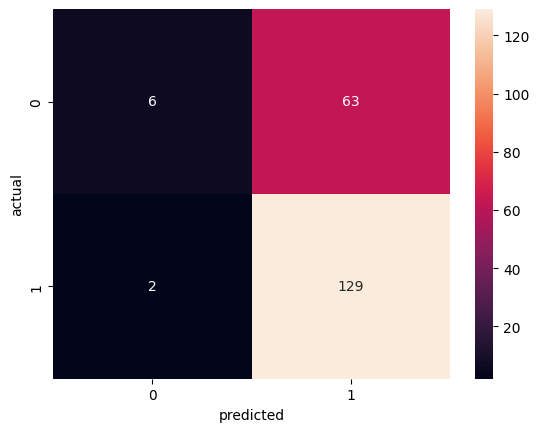

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# **RANDOM FOREST**

In [ ]:
file = 'dataset_31_credit-g (1).arff'

with open(file) as f:
    dataset = arff.load(f)
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [ ]:

from sklearn.ensemble import RandomForestClassifier

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
cat_columns = ['employment', 'checking_status', 'credit_history', 'purpose', 'savings_status',
                       'personal_status', 'other_parties', 'property_magnitude',
                       'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

X_train = pd.get_dummies(X_train, columns=cat_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_columns, drop_first=True)


In [ ]:
# model dan prediksi
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_train, y_train)

y_pred = rf_class.predict(X_test)

In [ ]:
# hasil RF

print("skor akurasi RF    :\n", accuracy_score(y_test, y_pred))
print("confusion matriks  :\n", confusion_matrix(y_test, y_pred))
print("metrik RF          :\n", classification_report(y_test, y_pred))
print("prediksi RF        :\n", y_pred)

skor akurasi RF    :
 0.795
confusion matriks  :
 [[ 28  31]
 [ 10 131]]
metrik RF          :
               precision    recall  f1-score   support

         bad       0.74      0.47      0.58        59
        good       0.81      0.93      0.86       141

    accuracy                           0.80       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.79      0.80      0.78       200

prediksi RF        :
 ['good' 'good' 'bad' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'bad' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good' 'good'
 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'bad' 'good' 'good'
 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good'
 'good' 'bad' 'good' 'good' 'good' 'bad' 'bad' 'good' 'good' 'bad' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'bad' 'good' 'good' 'good' 'bad' 'good

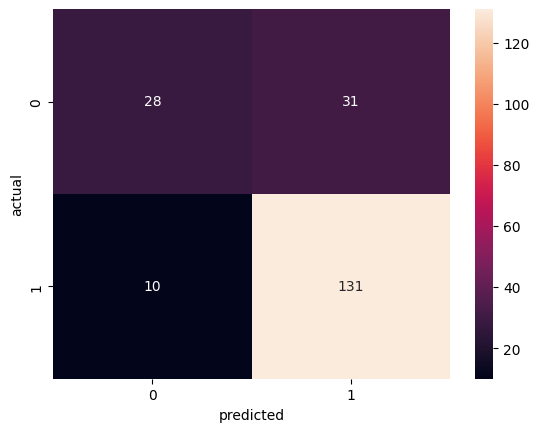

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

---
# **Kesimpulan**
Logistic Regression memiliki tingkat akurasi yang lebih rendah dibanding Random Forest yaitu dengan persentasi 67.5%. Kemampuan LR lebih baik saat memprediksi kelas kategori 'good' terlihat dari recall yang dimiliki yaitu 0.98.

Random Forest memiliki akurasi 79.5% dengan masing-masing metrik yang cukup tinggi dibanding LR. RF cukup seimbang dalam memprediksi kelas 'good' dan 'bad'.